# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any electorates over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [4]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-4-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [5]:

LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [6]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


In [7]:
##group the data by Voucher_Sport
saVouchersGroup1=sa_vouchers_scores.groupby('Voucher_Sport')
for group, item in saVouchersGroup1:
 print(saVouchersGroup1.get_group(group))


        Participant_ID Participant_Suburb       Club_Previous_Member  \
1510           1001511            ALDGATE      Registered Previously   
25283          1025284      ENCOUNTER BAY  Not Registered Previously   
25380          1025382      ENCOUNTER BAY  Not Registered Previously   
33428          1033429      GLENELG NORTH      Registered Previously   
34131          1034132           GLENSIDE      Registered Previously   
35712          1035713       GOOLWA BEACH  Not Registered Previously   
35734          1035735       GOOLWA BEACH  Not Registered Previously   
35759          1035760       GOOLWA BEACH  Not Registered Previously   
35961          1035962             GOOLWA  Not Registered Previously   
36120          1036121             GOOLWA  Not Registered Previously   
41369          1041370       HAPPY VALLEY  Not Registered Previously   
42185          1042187         HAYBOROUGH  Not Registered Previously   
42478          1042479         HEATHFIELD      Registered Previo

        Participant_ID Participant_Suburb       Club_Previous_Member  \
48             1000049     ABERFOYLE PARK  Not Registered Previously   
212            1000214     ABERFOYLE PARK      Registered Previously   
858            1000859           ADELAIDE      Registered Previously   
2052           1002054      ALDINGA BEACH      Registered Previously   
2053           1002054      ALDINGA BEACH  Not Registered Previously   
...                ...                ...                        ...   
118755         1118756     WEST HINDMARSH  Not Registered Previously   
124403         1124404          WOODCROFT  Not Registered Previously   
124418         1124421          WOODCROFT      Registered Previously   
124419         1124421          WOODCROFT  Not Registered Previously   
124420         1124421          WOODCROFT      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
48                       Not ATSI                   Not

        Participant_ID Participant_Suburb       Club_Previous_Member  \
7              1000008     ABERFOYLE PARK  Not Registered Previously   
8              1000011     ABERFOYLE PARK      Registered Previously   
20             1000021     ABERFOYLE PARK  Not Registered Previously   
23             1000024     ABERFOYLE PARK      Registered Previously   
35             1000036     ABERFOYLE PARK      Registered Previously   
...                ...                ...                        ...   
127521         1127524     ZADOWS LANDING      Registered Previously   
127522         1127524     ZADOWS LANDING      Registered Previously   
127523         1127524     ZADOWS LANDING      Registered Previously   
127524         1127526     ZADOWS LANDING      Registered Previously   
127525         1127526     ZADOWS LANDING      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
7                        Not ATSI                   Not

[62 rows x 18 columns]
        Participant_ID  Participant_Suburb       Club_Previous_Member  \
7770           1007771            BEAUMONT  Not Registered Previously   
9404           1009405        BLACK FOREST  Not Registered Previously   
9424           1009425        BLACK FOREST  Not Registered Previously   
12364          1012365           BROADVIEW      Registered Previously   
12983          1012984            BURNSIDE      Registered Previously   
13080          1013082            BURNSIDE      Registered Previously   
13081          1013082            BURNSIDE      Registered Previously   
13136          1013137            BURNSIDE      Registered Previously   
34094          1034095            GLENSIDE  Not Registered Previously   
38409          1038411    GULFVIEW HEIGHTS      Registered Previously   
41474          1041475        HAPPY VALLEY      Registered Previously   
46636          1046637           HYDE PARK  Not Registered Previously   
46637          1046638      

In [8]:
## display the number of partcipants for each sport in South Australia(SA)
saVouchersGroup1.size()

Voucher_Sport
Archery                 34
Athletics             4518
Australian Rules     47224
BMX                    157
Badminton                4
Baseball               865
Basketball            6016
Bowls                    2
Calisthenics          2522
Cricket               1875
Cycling                105
Dancesport               2
Diving                  89
Equestrian             265
Fencing                 84
Football (Soccer)    15775
Golf                   188
Gymnastics            9823
Hockey                3026
Ice Skating             86
Ju Jitsu                22
Judo                   210
Karate                  91
Kung Fu (Wu Shu)         2
Lacrosse               656
Motor Sport             45
Motorcycling            97
Netball              24017
Orienteering            56
Paralympics              3
Pony Clubs              17
Roller Sports          148
Rowing                  22
Rugby League           270
Rugby Union            734
Sailing                 40
Shooting      

<AxesSubplot:ylabel='sport distribution'>

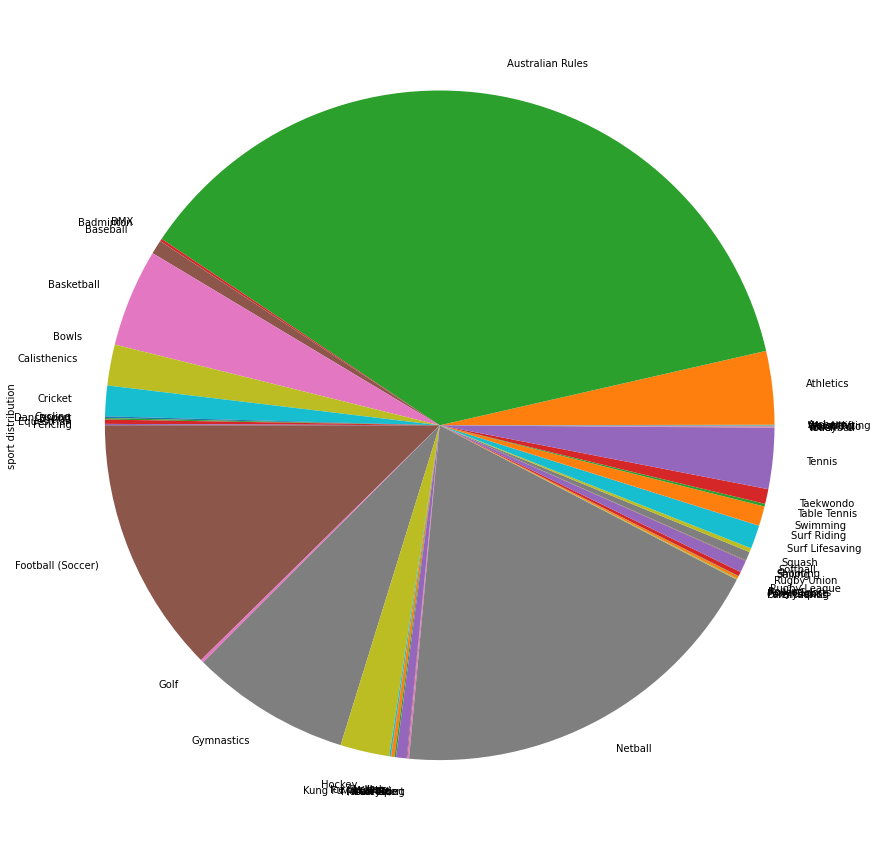

In [9]:
saVouchersGroup1.size().plot.pie(ylabel='sport distribution',figsize=(15,70))
## Using a pie chart to demonstrate the distribution of sport in SA

In [10]:
## group the data by the Participant_LGA in SA
saVouchersGroup2=sa_vouchers_scores.groupby('Participant_LGA')
for group, item in saVouchersGroup2:
 print(saVouchersGroup2.get_group(group))

       Participant_ID Participant_Suburb       Club_Previous_Member  \
829           1000830           ADELAIDE  Not Registered Previously   
830           1000831           ADELAIDE      Registered Previously   
831           1000833           ADELAIDE      Registered Previously   
832           1000833           ADELAIDE      Registered Previously   
833           1000834           ADELAIDE  Not Registered Previously   
...               ...                ...                        ...   
76965         1076967     NORTH ADELAIDE      Registered Previously   
76966         1076967     NORTH ADELAIDE      Registered Previously   
76967         1076968     NORTH ADELAIDE      Registered Previously   
76968         1076969     NORTH ADELAIDE  Not Registered Previously   
76969         1076970     NORTH ADELAIDE  Not Registered Previously   

      Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
829                     Not ATSI                       CALD         

18346  870.0  870.0  869.0  870.0      1694.0  
        Participant_ID Participant_Suburb       Club_Previous_Member  \
10855          1010856        BOORS PLAIN      Registered Previously   
10856          1010857        BOORS PLAIN      Registered Previously   
10857          1010858        BOORS PLAIN      Registered Previously   
20796          1020797        CROSS ROADS  Not Registered Previously   
20797          1020798        CROSS ROADS      Registered Previously   
...                ...                ...                        ...   
117072         1117073           WALLAROO      Registered Previously   
117110         1117111           WARBURTO      Registered Previously   
117111         1117112           WARBURTO      Registered Previously   
117112         1117113           WARBURTO      Registered Previously   
117113         1117114           WARBURTO      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
10855  

        Participant_ID Participant_Suburb       Club_Previous_Member  \
3077           1003078    ALLENDALE NORTH      Registered Previously   
3078           1003079    ALLENDALE NORTH      Registered Previously   
3079           1003080    ALLENDALE NORTH      Registered Previously   
3080           1003081    ALLENDALE NORTH  Not Registered Previously   
3081           1003082    ALLENDALE NORTH  Not Registered Previously   
...                ...                ...                        ...   
117640         1117642            WASLEYS      Registered Previously   
117641         1117642            WASLEYS      Registered Previously   
117642         1117643            WASLEYS  Not Registered Previously   
126180         1126181          WOOLSHEDS  Not Registered Previously   
126181         1126182          WOOLSHEDS      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
3077                     Not ATSI                   Not

        Participant_ID Participant_Suburb       Club_Previous_Member  \
0              1000002     ABERFOYLE PARK      Registered Previously   
1              1000002     ABERFOYLE PARK      Registered Previously   
2              1000004     ABERFOYLE PARK  Not Registered Previously   
3              1000004     ABERFOYLE PARK      Registered Previously   
4              1000005     ABERFOYLE PARK      Registered Previously   
...                ...                ...                        ...   
125059         1125060          WOODCROFT  Not Registered Previously   
125060         1125061          WOODCROFT      Registered Previously   
125061         1125063          WOODCROFT      Registered Previously   
125062         1125063          WOODCROFT      Registered Previously   
125063         1125064          WOODCROFT  Not Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
0                        Not ATSI                   Not

[278 rows x 18 columns]
        Participant_ID Participant_Suburb       Club_Previous_Member  \
6637           1006638            BANGHAM  Not Registered Previously   
6638           1006639            BANGHAM  Not Registered Previously   
6639           1006640            BANGHAM  Not Registered Previously   
6640           1006641            BANGHAM      Registered Previously   
6641           1006642            BANGHAM      Registered Previously   
...                ...                ...                        ...   
123891         1123892           WOLSELEY  Not Registered Previously   
123892         1123895           WOLSELEY      Registered Previously   
123893         1123895           WOLSELEY      Registered Previously   
123894         1123895           WOLSELEY      Registered Previously   
123895         1123896           WOLSELEY      Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
6637                     Not AT

[443 rows x 18 columns]
        Participant_ID Participant_Suburb       Club_Previous_Member  \
1018           1001019              AGERY      Registered Previously   
4939           1004940          ARDROSSAN      Registered Previously   
4940           1004943          ARDROSSAN      Registered Previously   
4941           1004943          ARDROSSAN      Registered Previously   
4942           1004943          ARDROSSAN  Not Registered Previously   
...                ...                ...                        ...   
127462         1127463          YORKETOWN      Registered Previously   
127463         1127464          YORKETOWN      Registered Previously   
127464         1127466          YORKETOWN      Registered Previously   
127465         1127466          YORKETOWN      Registered Previously   
127466         1127467          YORKETOWN  Not Registered Previously   

       Participant_ATSI_Indicator Participant_CALD_Indicator Participant_Sex  \
1018                     Not AT

In [11]:
## display the number of participants in each LGA
saVouchersGroup2.size()

Participant_LGA
ADELAIDE            302
ADELAIDE HILLS     4756
ADELAIDE PLAINS     899
ALEXANDRINA        2979
BAROSSA            2874
                   ... 
WEST TORRENS       2844
WHYALLA            2488
WUDINNA             267
YANKALILLA          443
YORKE PENINSULA     977
Length: 69, dtype: int64

<AxesSubplot:xlabel='Participant_LGA', ylabel='SA LGAs'>

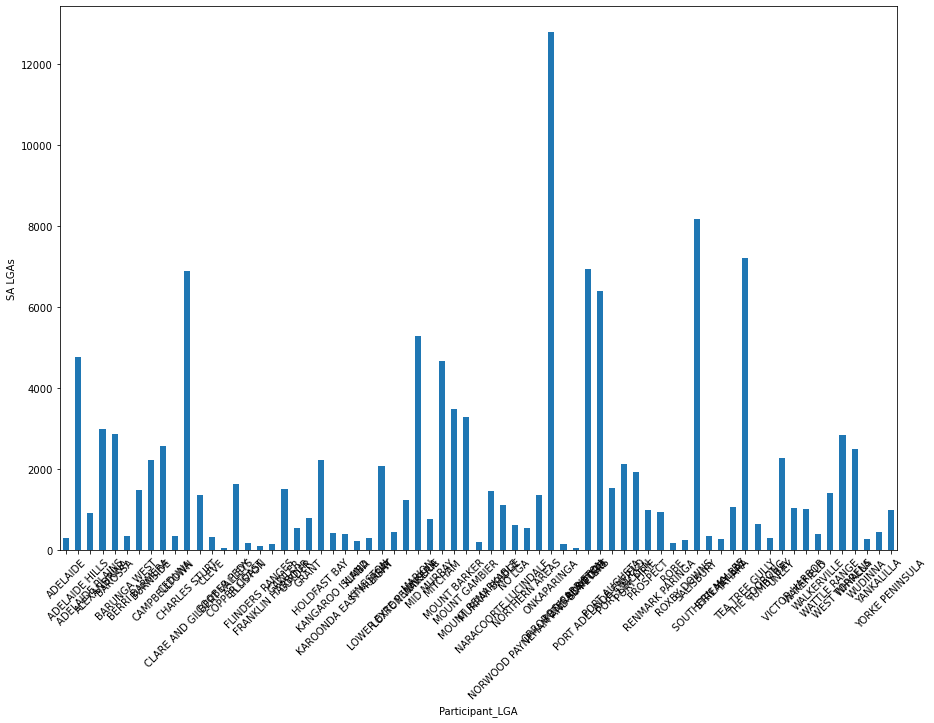

In [12]:
## using a bar chart to visualize the distribution of participants in each LGA in SA
saVouchersGroup2.size().plot.bar(ylabel='SA LGAs',rot=45,figsize=(15,10))

In [13]:
## Display the sport with the most participants
sa_vouchers.Voucher_Sport.describe()


count               127526
unique                  50
top       Australian Rules
freq                 47224
Name: Voucher_Sport, dtype: object

In [14]:
print("The most popular sport in all LGA is Australian Rules, which has 47224 participants")

The most popular sport in all LGA is Australian Rules, which has 47224 participants


In [15]:
## display the LGA with the most participants
sa_vouchers_scores.Participant_LGA.describe()

count          127526
unique             69
top       ONKAPARINGA
freq            12782
Name: Participant_LGA, dtype: object

In [16]:
print("The LGA with the most participants is Onkaparinga with 12782 participants in total.")

The LGA with the most participants is Onkaparinga with 12782 participants in total.


### Question Two 
 Are some sports more popular in different parts of the state?

In [17]:
sportPPL=sa_vouchers_scores.Voucher_Sport

<AxesSubplot:>

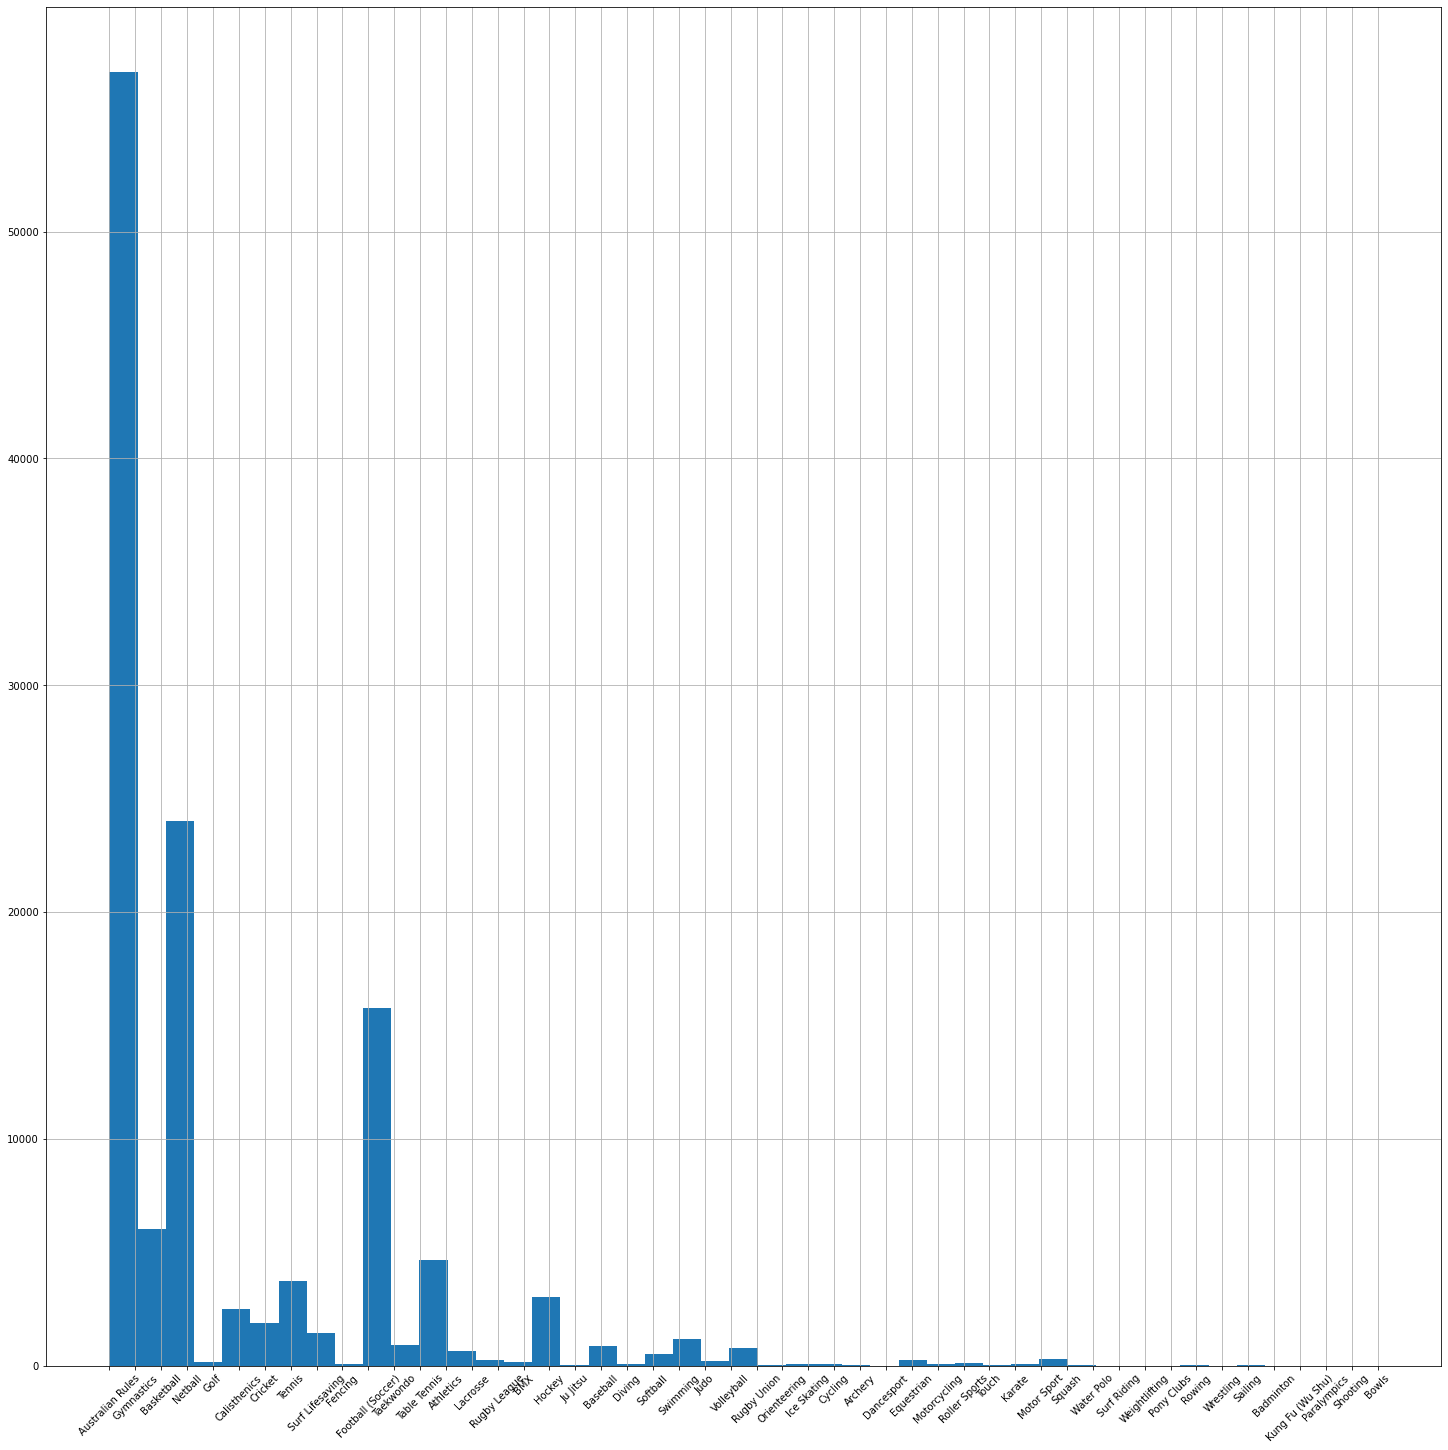

In [18]:
## plot a histogram which shows the participants of each sport
plt.xticks(rotation = 45) 
sportPPL.hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)##blue

In [19]:
## plot histograms for the top three sports in SA
AustralianRulesPPL=sa_vouchers_scores[(sa_vouchers_scores.Voucher_Sport=='Australian Rules')]
SoccerPPL=sa_vouchers_scores[(sa_vouchers_scores.Voucher_Sport=='Football (Soccer)')]
NetballPPL=sa_vouchers_scores[(sa_vouchers_scores.Voucher_Sport=='Netball')]
SoccerPPL

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
50,1000051,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Male,50,South Adelaide Panthers Soccer Club,Football (Soccer),ONKAPARINGA,FISHER,27/4/16 22:44,2016,996.0,996.0,975.0,993.0,159517.0
99,1000101,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Cumberland United Womens Football Club,Football (Soccer),ONKAPARINGA,FISHER,30/3/17 0:40,2017,996.0,996.0,975.0,993.0,159517.0
111,1000112,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,The Cove FC,Football (Soccer),ONKAPARINGA,FISHER,29/11/16 6:58,2016,996.0,996.0,975.0,993.0,159517.0
136,1000137,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Cumberland United Womens Football Club,Football (Soccer),ONKAPARINGA,FISHER,30/3/17 0:40,2017,996.0,996.0,975.0,993.0,159517.0
153,1000156,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Seaford Sports and Social Club,Football (Soccer),ONKAPARINGA,FISHER,27/2/17 2:44,2017,996.0,996.0,975.0,993.0,159517.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127363,1127364,YONGALA,Not Registered Previously,Not ATSI,Not CALD,Male,50,Jamestown and Districts Soccer Club,Football (Soccer),PETERBOROUGH,STUART,31/5/16 0:31,2016,873.0,873.0,808.0,798.0,1733.0
127364,1127365,YONGALA,Registered Previously,Not ATSI,Not CALD,Male,50,Jamestown and Districts Soccer Club,Football (Soccer),PETERBOROUGH,STUART,30/5/17 7:51,2017,873.0,873.0,808.0,798.0,1733.0
127494,1127496,YUNDI,Registered Previously,Not ATSI,Not CALD,Male,50,South Adelaide Panthers Soccer Club,Football (Soccer),ALEXANDRINA,FINNISS,28/5/15 23:09,2015,1000.0,1000.0,969.0,987.0,23693.0
127495,1127496,YUNDI,Registered Previously,Not ATSI,Not CALD,Male,50,South Adelaide Panthers Soccer Club,Football (Soccer),ALEXANDRINA,FINNISS,25/2/16 2:25,2016,1000.0,1000.0,969.0,987.0,23693.0


<AxesSubplot:>

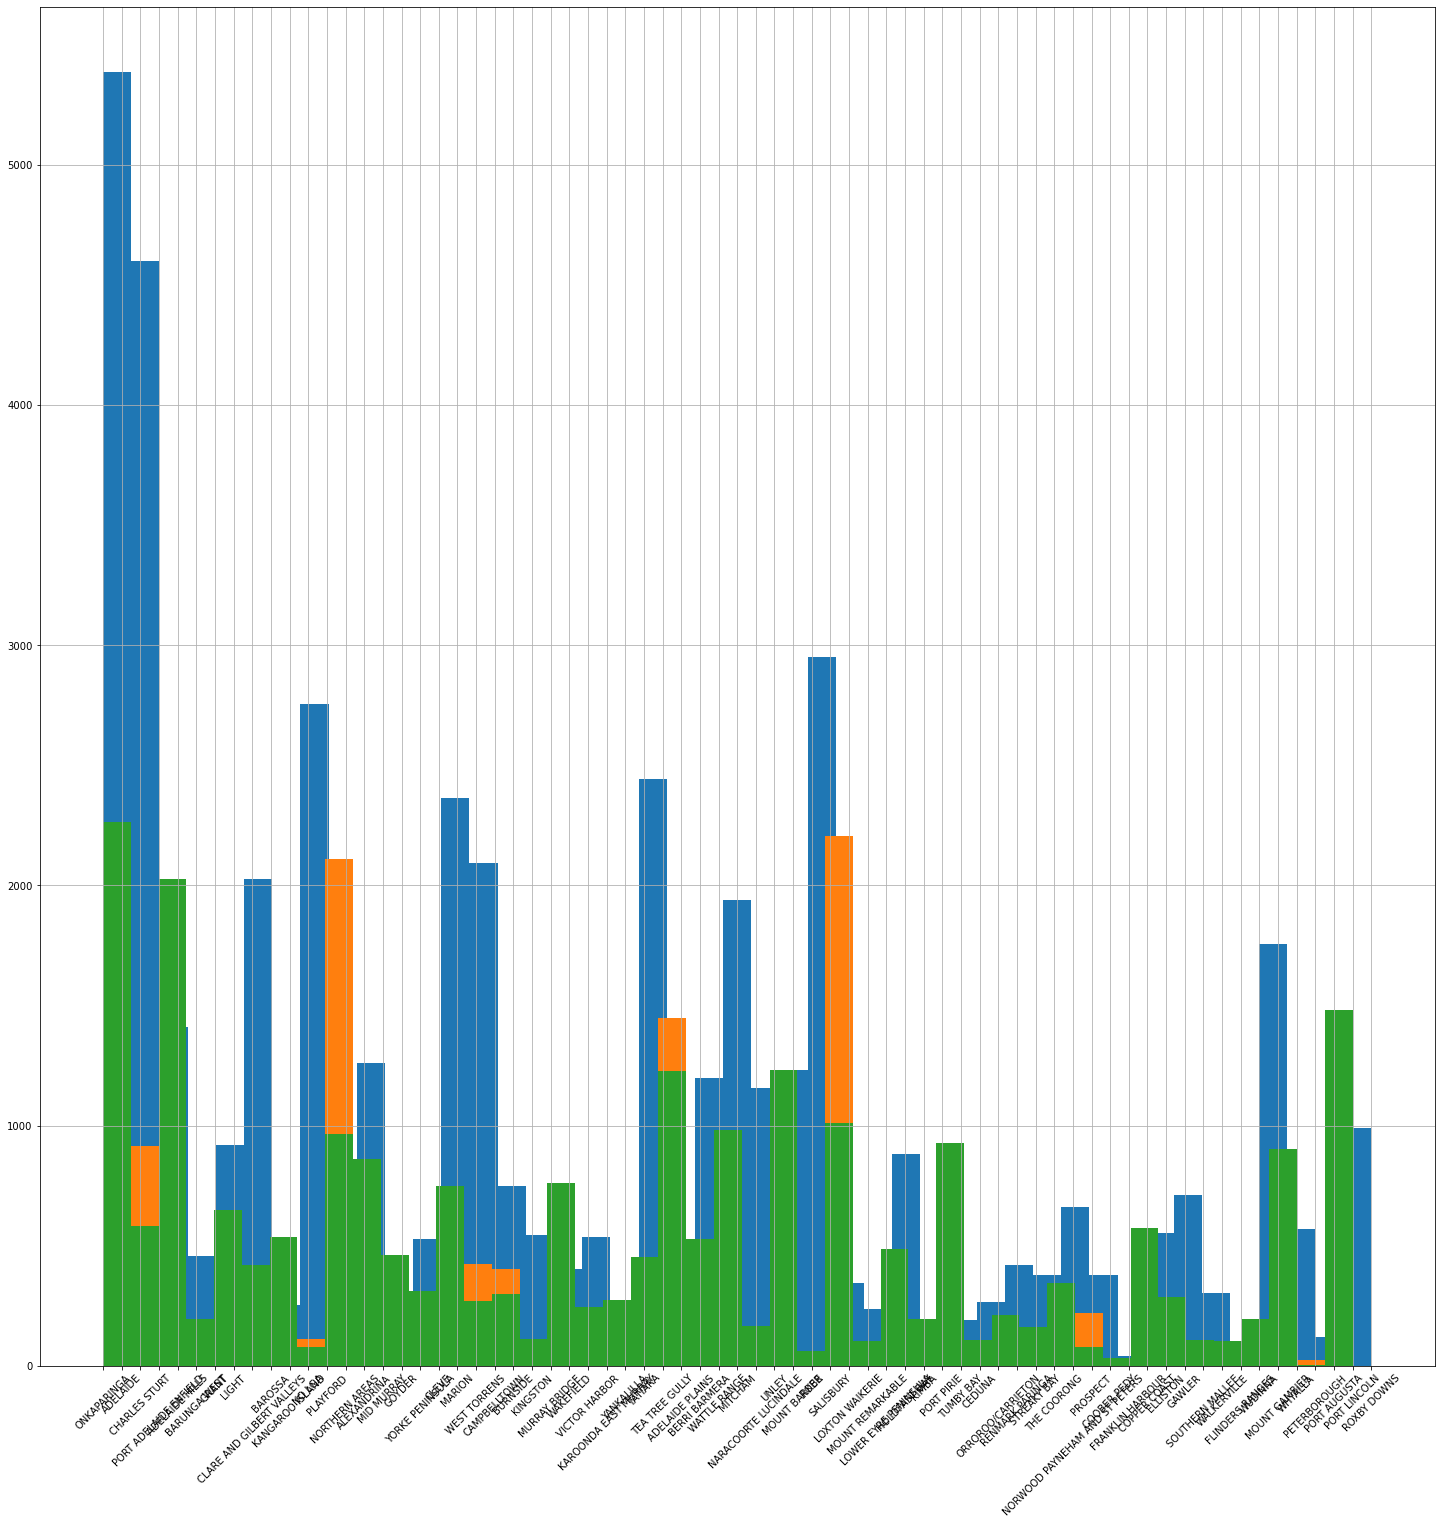

In [20]:
## plot a stepfilled histograms which shows that some sports are more popular in other parts of the state.
plt.xticks(rotation = 45) 
AustralianRulesPPL['Participant_LGA'].hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)##blue
SoccerPPL['Participant_LGA'].hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)##orange

NetballPPL['Participant_LGA'].hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)##green


### Some sports are actually more popular in other parts of the state, the top 3 popular sports other than Australian Rules in the state are plotted using a stepfilled histogram.  It is evident that Soccer and Netball are having more players in some of the LGAs than Australian rules.
Hence showing some sports are more popular in different part of states.

## Question three
Are any electorates over/under represented in their use of vouchers?

In [43]:
## generate a column which shows all the LGAs with their number of participants
SA_LGA=pd.DataFrame({'number of participants in LGA':saVouchersGroup2.size()})
SA_LGA

,number of participants in LGA
Participant_LGA,
ADELAIDE,302
ADELAIDE HILLS,4756
ADELAIDE PLAINS,899
ALEXANDRINA,2979
BAROSSA,2874
...,...
WEST TORRENS,2844
WHYALLA,2488
WUDINNA,267


In [44]:
## Generate the mean for the number of participants in SA LGAs
SA_LGA.mean()

number of participants in LGA    1848.202899
dtype: float64

#### The electorate is under represented when its LGA participant number is below the average and it's over represented when its LGA participant number is above the average

In [65]:
## The following 47 LGAs are under represented
under_rep=SA_LGA[SA_LGA<SA_LGA.mean()]
under_rep=under_rep.dropna()
under_rep

,number of participants in LGA
Participant_LGA,
ADELAIDE,302.0
ADELAIDE PLAINS,899.0
BARUNGA WEST,333.0
BERRI BARMERA,1486.0
CEDUNA,350.0
CLARE AND GILBERT VALLEYS,1349.0
CLEVE,329.0
COOBER PEDY,39.0
COPPER COAST,1629.0


In [64]:
under_rep.shape

(47, 1)

In [73]:
##The following 22 LGAs are over represented
over_rep=SA_LGA[SA_LGA>SA_LGA.mean()]
over_rep=over_rep.dropna()
over_rep

,number of participants in LGA
Participant_LGA,
ADELAIDE HILLS,4756.0
ALEXANDRINA,2979.0
BAROSSA,2874.0
BURNSIDE,2213.0
CAMPBELLTOWN,2567.0
CHARLES STURT,6897.0
HOLDFAST BAY,2215.0
LIGHT,2066.0
MARION,5291.0


In [70]:
over_rep.shape

(22, 1)

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [21]:
## read the data from QLD
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00


In [22]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()

<ipython-input-22-d688531e2bfc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()


,Application Number,Voucher Number,Child Age (at time of Application),Gender,Has your child played sport before?,Participation Activity,Club Name,Club Suburb/Town,Club Local Government Area Name,Club State Electoral District Name,Parent Suburb/Town,Total Payment,LGA,IEO,IER,IRSAD,IRSD,Population
0,2000012253,Q89QDUXP,10,NaN,Yes,*Other,Queensland Police-Citizens Youth Welfare Assoc...,Airlie Beach,Whitsunday (R),Whitsunday,Jubilee Pocket,60.01,WHITSUNDAY,989.0,989.0,966.0,982.0,31393.0
1,2000001727,593F6Y41,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Leichhardt,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
2,2000013464,PH2R4RTT,5,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Woodridge,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
3,2000009270,035SE2H5,5,NaN,Yes,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Yatala,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0
4,2000007273,NP6C4729,6,NaN,No,*Other,Guides Queensland,Windsor,Brisbane (C),Brisbane Central,Alexandra Hills,150.00,BRISBANE,1018.0,1018.0,1057.0,1048.0,1042074.0


In [23]:
##Group the data by LGA, which counts the number of times each LGA appears
qld_group=qld_vouchers_scores.groupby('LGA')
qld_group.size()


LGA
BANANA (S)              3
BLACKALL TAMBO          3
BRISBANE             1425
BUNDABERG             116
BURDEKIN (S)           21
CAIRNS                266
CASSOWARY COAST        42
CENTRAL HIGHLANDS      26
CHARTERS TOWERS        15
DOUGLAS (S)            33
FLINDERS (S)           12
FRASER COAST          320
GLADSTONE              28
GOLD COAST           1700
GYMPIE                193
HERVEY BAY              3
HINCHINBROOK (S)       82
IPSWICH               483
ISAAC                   1
LIVINGSTONE (S)         7
LOCKYER VALLEY         36
LOGAN                 805
LONGREACH               1
MACKAY                 64
MARANOA                 2
MAREEBA (S)            62
MCKINLAY (S)           17
MORETON BAY           938
MOUNT ISA               3
MURWEH (S)              1
NOOSA (S)             274
NORTH BURNETT           6
QUILPIE (S)             4
REDLAND               384
ROCKHAMPTON            71
SCENIC RIM             55
SOMERSET               20
SOUTH BURNETT         107
SOUTHERN

In [24]:
print('Hence, there are ',len(qld_group.size()),'LGAs participated in total')

Hence, there are  45 LGAs participated in total


In [25]:
## group the data by the number of participants in each sport
qld_sport=qld_vouchers_scores.groupby('Participation Activity')
qld_sport.size()

Participation Activity
*Other                      13
Archery                      7
Athletics                   97
Australian Football        548
BMX Bicycle Motocross       47
                          ... 
Touch                       65
Trail Bike Riding            1
Trampolining                18
Weightlifting                1
Zen Do Kai Martial Arts      5
Length: 66, dtype: int64

In [26]:
## generate a column for the number of participants of each sport, for better visualization
qld_LGA_data=pd.DataFrame({'number of participants in LGA':qld_group.size()})
qld_LGA_data.head(66)

,number of participants in LGA
LGA,
BANANA (S),3
BLACKALL TAMBO,3
BRISBANE,1425
BUNDABERG,116
BURDEKIN (S),21
CAIRNS,266
CASSOWARY COAST,42
CENTRAL HIGHLANDS,26
CHARTERS TOWERS,15


[]

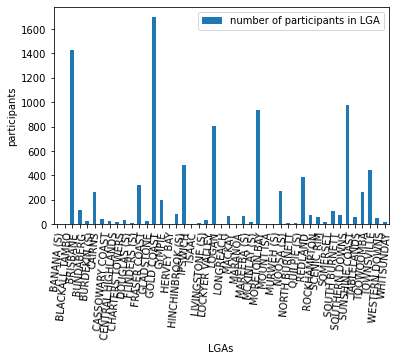

In [27]:
##generate a bar chart to visualiza the distribution of participants in each LGA
qld_LGA_data.plot.bar(xlabel='LGAs',ylabel='participants',rot=85)
plt.plot(bins=35,figuresize=(50,50))


From the histogram of the use of vouchers in each LGA, it's evident that Brisbane,Gold Coast and Sunshine coast are the top 3 LGAs with the most voucher users.

In [28]:
##group the data by their LGAs
qldSportGroup=qld_vouchers_scores.groupby('Club Local Government Area Name')
for group, item in qldSportGroup:
 print(qldSportGroup.get_group(group))

      Application Number Voucher Number  Child Age (at time of Application)  \
1385          2000010230       G23KGMMC                                  10   
1479          2000011941       2EA4P6LQ                                   5   
4853          2000007669       NNE69VA5                                  11   

      Gender Has your child played sport before? Participation Activity  \
1385     NaN                                 Yes             Equestrian   
1479     NaN                                  No      Football (Soccer)   
4853     NaN                                 Yes                Netball   

                                 Club Name Club Suburb/Town  \
1385          Moura Hack and Pony Club Inc            Moura   
1479  Moura Rangers Soccer Association Inc            Moura   
4853       Biloela Netball Association Inc          Biloela   

     Club Local Government Area Name Club State Electoral District  Name  \
1385                      Banana (S)                 

9214  1016.0     57874.0  
      Application Number Voucher Number  Child Age (at time of Application)  \
12            2000009610       VU1BUK90                                  16   
96            2000010325       4Y1WZVC6                                  14   
105           2000010344       ZBHO68YX                                  17   
118           2000012609       KF0C5C25                                   5   
125           2000012500       4SZF47YS                                   5   
...                  ...            ...                                 ...   
9469          2000012141       D4MFDX49                                  14   
9476          2000007215       26RS9KEI                                  15   
9479          2000007229       J6DD08PC                                  16   
9480          2000007235       FAWI8HGJ                                  16   
9481          2000008009       X756DKFP                                  16   

      Gender Has your ch

5861         NaN  
      Application Number Voucher Number  Child Age (at time of Application)  \
18            2000002670       YBI0IDYO                                  15   
24            2000002457       KCAJLERK                                   8   
34            2000001008       YW6584T0                                   6   
51            2000001070       1T1172JI                                   5   
69            2000008216       HX0GMFD5                                  10   
...                  ...            ...                                 ...   
9423          2000000137       6VV2P429                                  12   
9424          2000003835       IDE01T5Q                                  12   
9425          2000000544       N4ALO3G7                                  13   
9426          2000002425       QQ4A9VYU                                  13   
9484          2000001771       U6P7U746                                  15   

      Gender Has your child play

      Application Number Voucher Number  Child Age (at time of Application)  \
30            2000001251       9Y4JT3I1                                   6   
31            2000001211       86PZETFL                                   9   
32            2000001135       VRM08SD8                                  11   
33            2000005623       5GVXRX45                                  15   
1062          2000006341       3B62Q3OU                                   7   
1386          2000007974       7411SOBQ                                   6   
1387          2000007970       I08FRGNM                                   9   
1388          2000008129       49Z3F5FO                                   9   
1389          2000008118       C4CI42CQ                                  10   
1390          2000007963       N2OOHDTE                                  12   
1514          2000010048       6ZUFPYPG                                   8   
1517          2000009292       6BW53D9R             

<AxesSubplot:ylabel='sport distribution'>

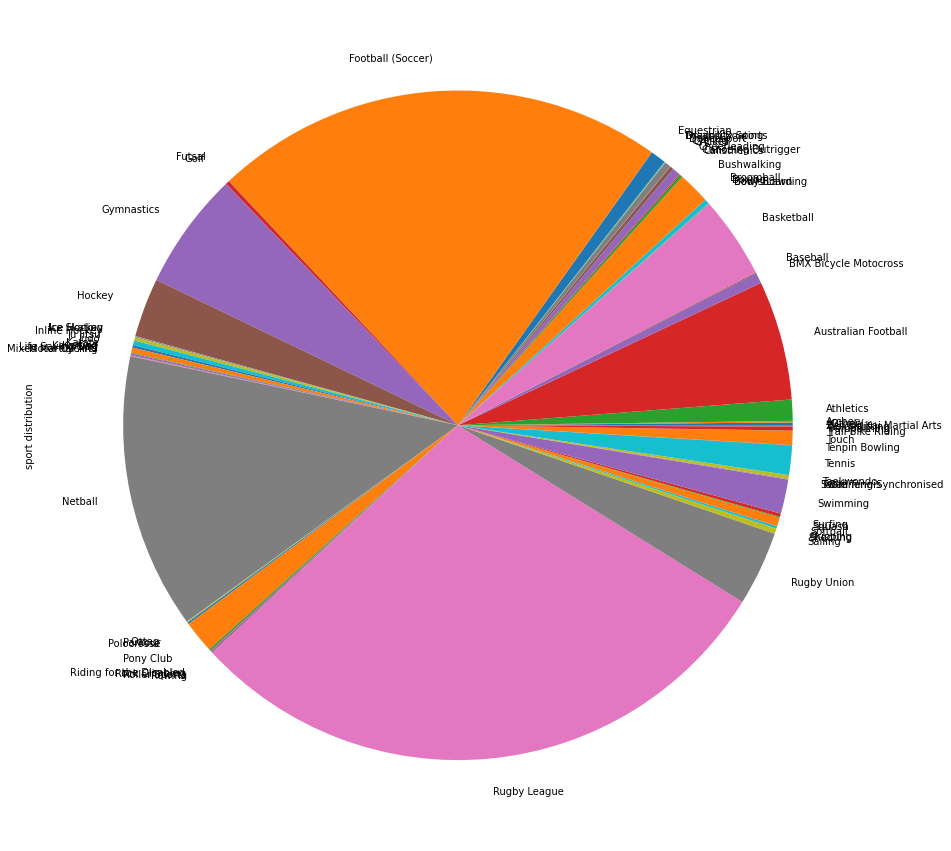

In [29]:
## using the group from above the display the distribution of participants in all sports
qld_sport.size().plot.pie(ylabel='sport distribution',figsize=(15,70))

From the pie graph of sport distribution in queensland, it's evident that the top three played sports are Rugby League, Football(Soccer)and Netball.

In [31]:
## assign the variable to all data related to the sports in QLD
qld_sportPPL=qld_vouchers_scores['Participation Activity']
qld_sportPPL

0                        *Other
1                        *Other
2                        *Other
3                        *Other
4                        *Other
                 ...           
9502    Zen Do Kai Martial Arts
9503    Zen Do Kai Martial Arts
9504    Zen Do Kai Martial Arts
9505    Zen Do Kai Martial Arts
9506    Zen Do Kai Martial Arts
Name: Participation Activity, Length: 9507, dtype: object

<AxesSubplot:>

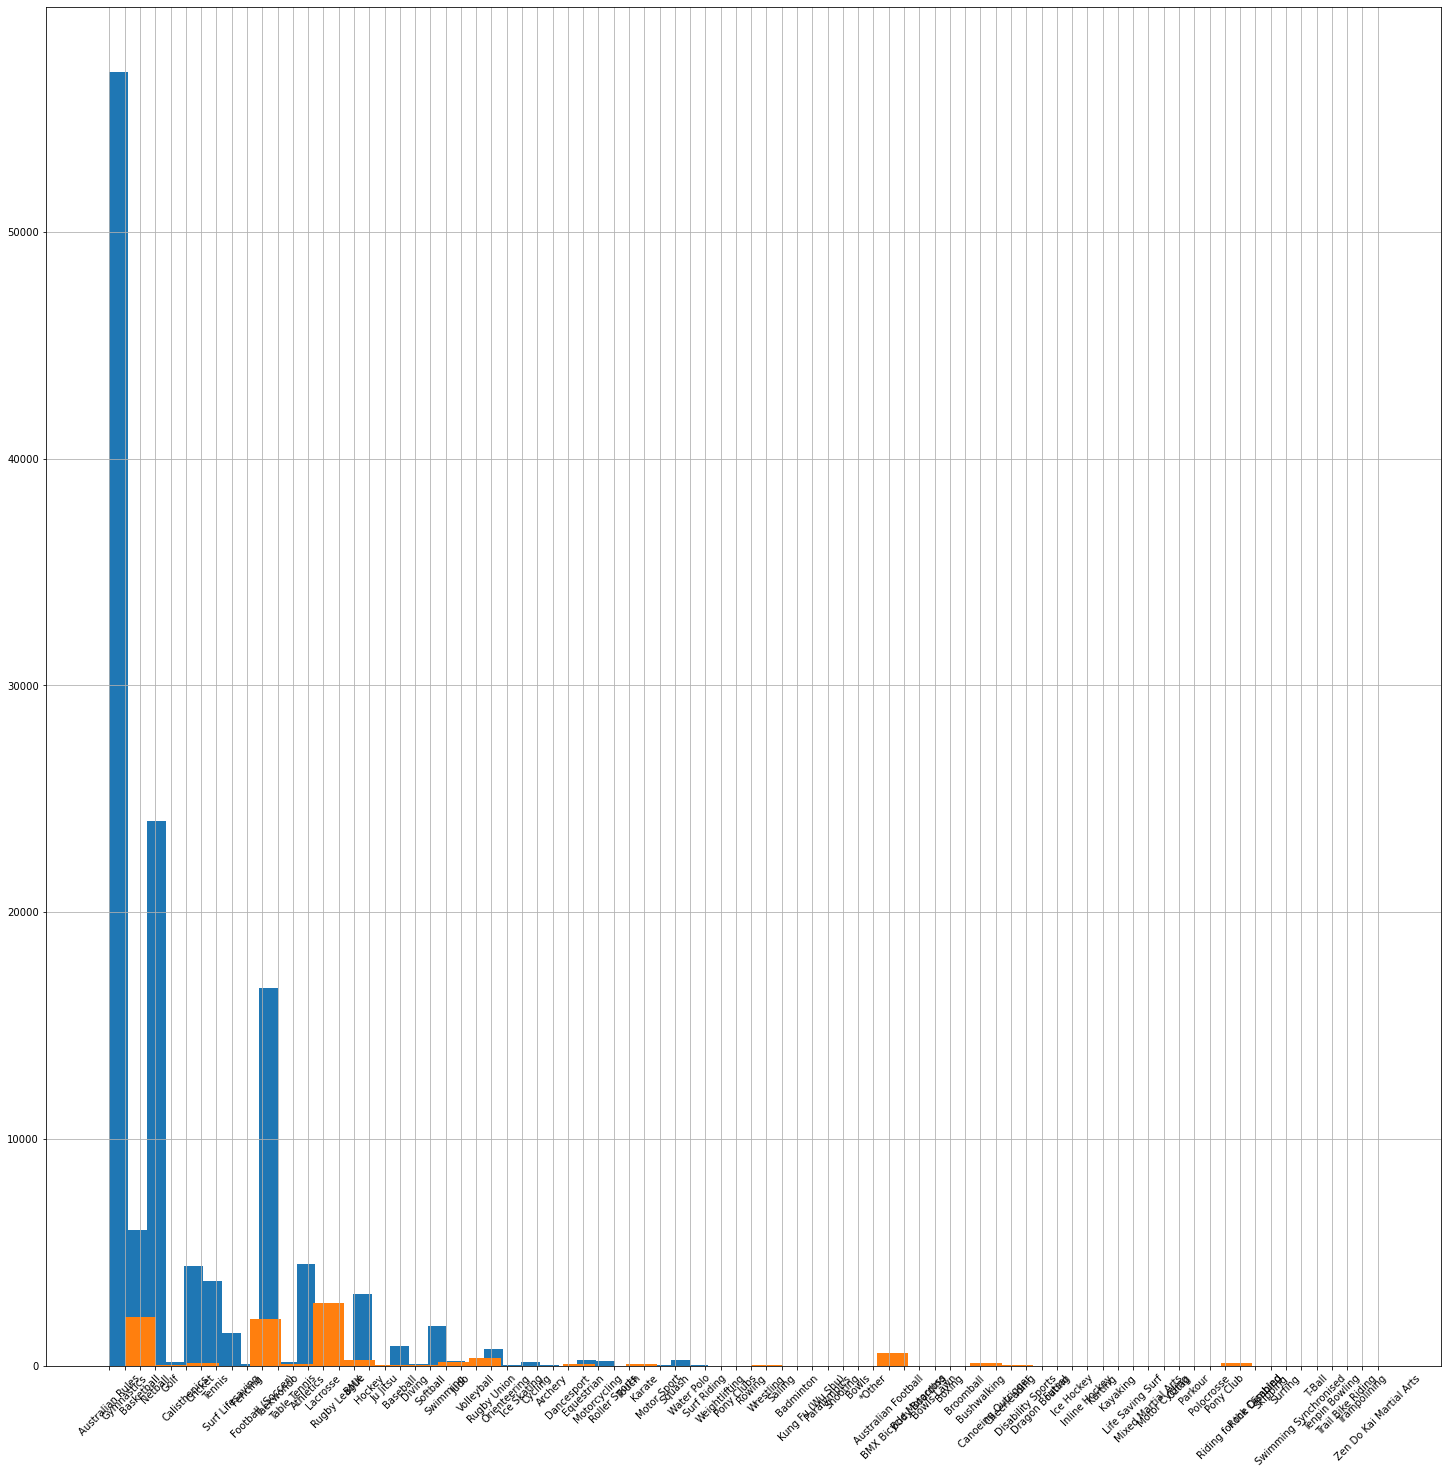

In [37]:
## using histogram to compare the number of participants in QLD and SA
plt.xticks(rotation = 45) 
sportPPL.hist(density=0,histtype="stepfilled",bins=40,figsize=(25,25),)##blue is SA
qld_sportPPL.hist(density=0,histtype="stepfilled",bins=40,figsize=(25,25),)##orange is QLD


### Evaluation:
The number of voucher users in SA is much higher than the user number in QLD, this is evident from the histogram above, which shows that the blue bars reach much higher values than the orange bars, under the same y-axis.

### Two of the top sports in queensland are:Rugby League and Netball
### Two of the top sports in SA are: Australian Rules and Netball.

Hnece, we are comparing the number of participants in both states for Rugby league and Australian Rules and Netball .

In [34]:
qld_Netball=qld_vouchers_scores[(qld_vouchers_scores['Participation Activity']=='Netball')]

qld_Rugby=qld_vouchers_scores[(qld_vouchers_scores['Participation Activity']=='Rugby League')]

<AxesSubplot:>

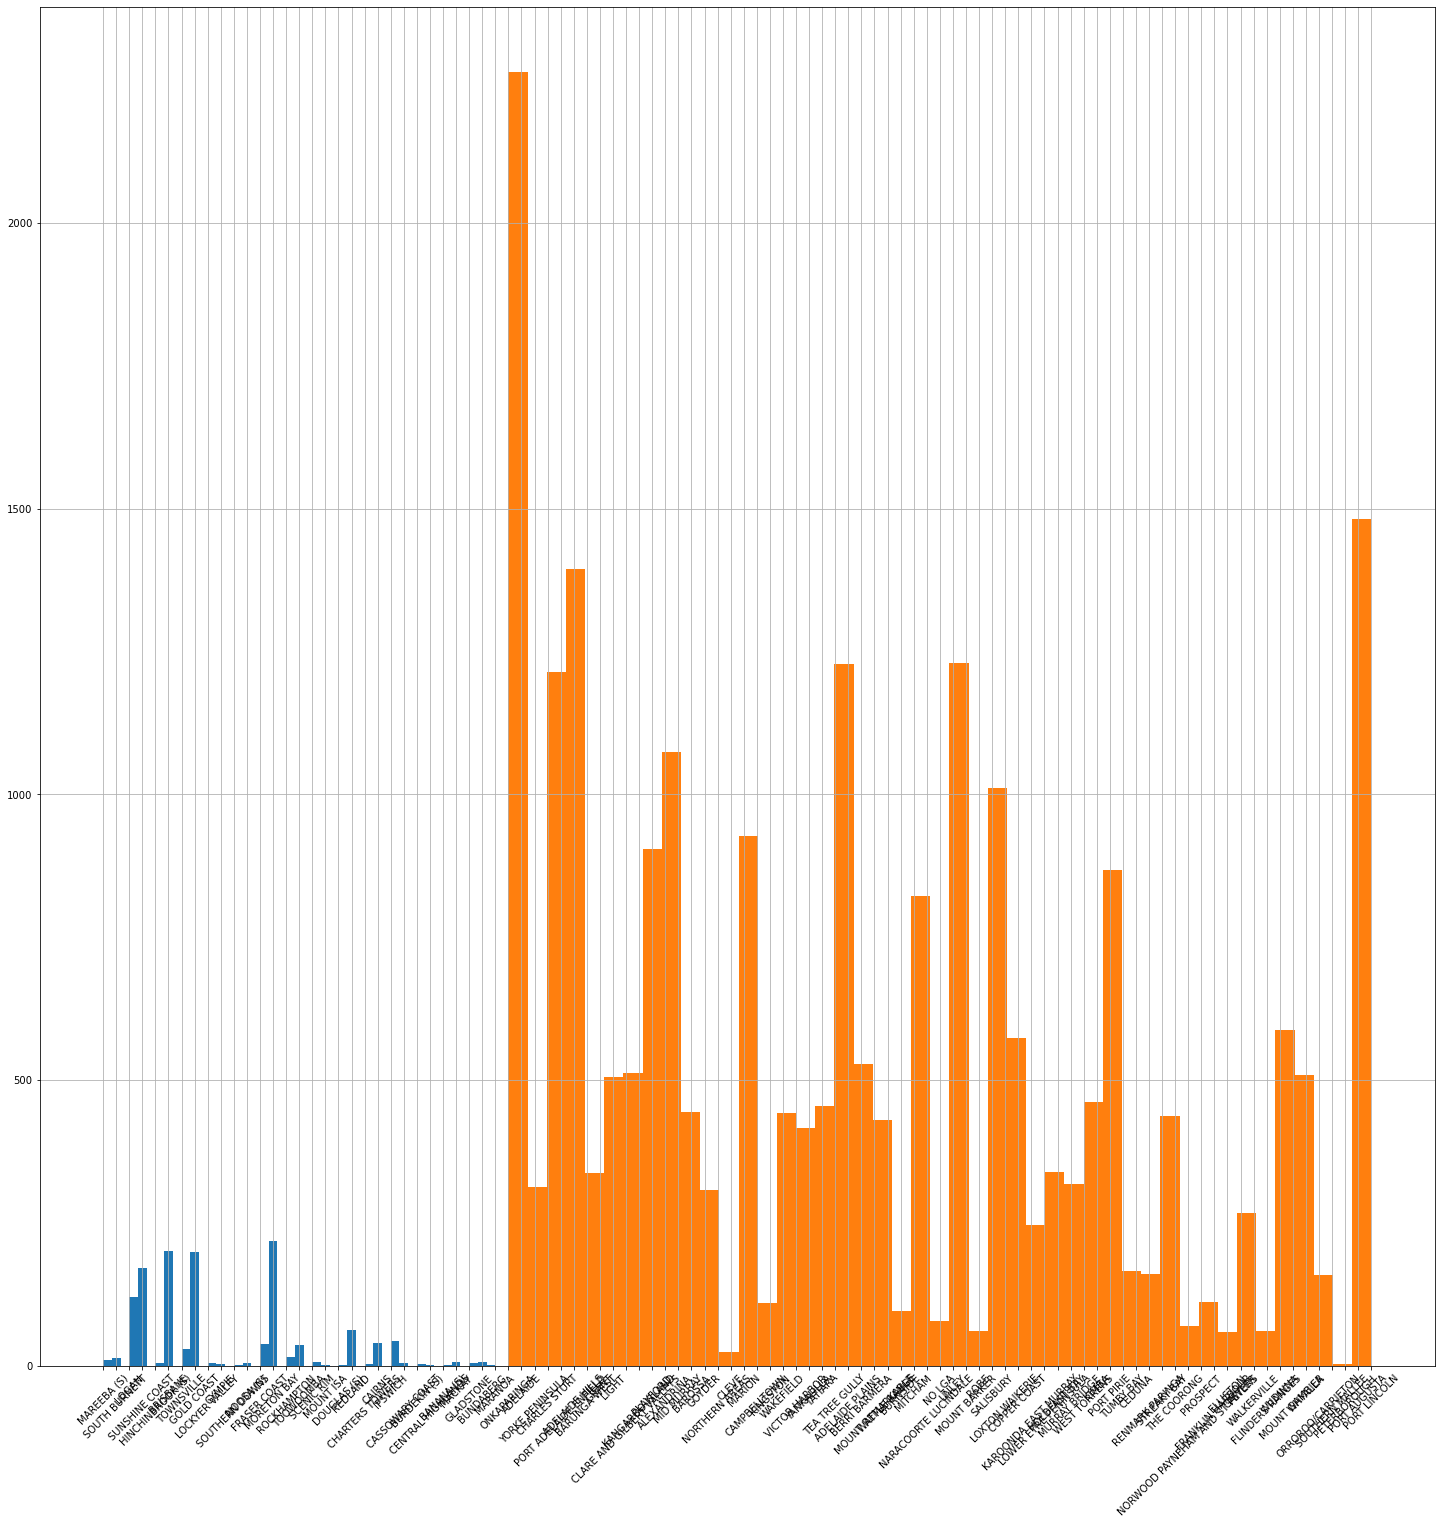

In [38]:
## compare the number of Netball players in both states
plt.xticks(rotation=45)
qld_Netball['LGA'].hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)## blue bar represents QLD
NetballPPL['Participant_LGA'].hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)## orange represents SA

   #### Netball is one of the sports with the most participants in both of the states. By comparing the number of Netball players in both states, under the same y-axis, it's evident that Netball players in SA are much higher than Netball players in QLD, which suggests that people in SA are more interested in playing Netball than QLD people

<AxesSubplot:>

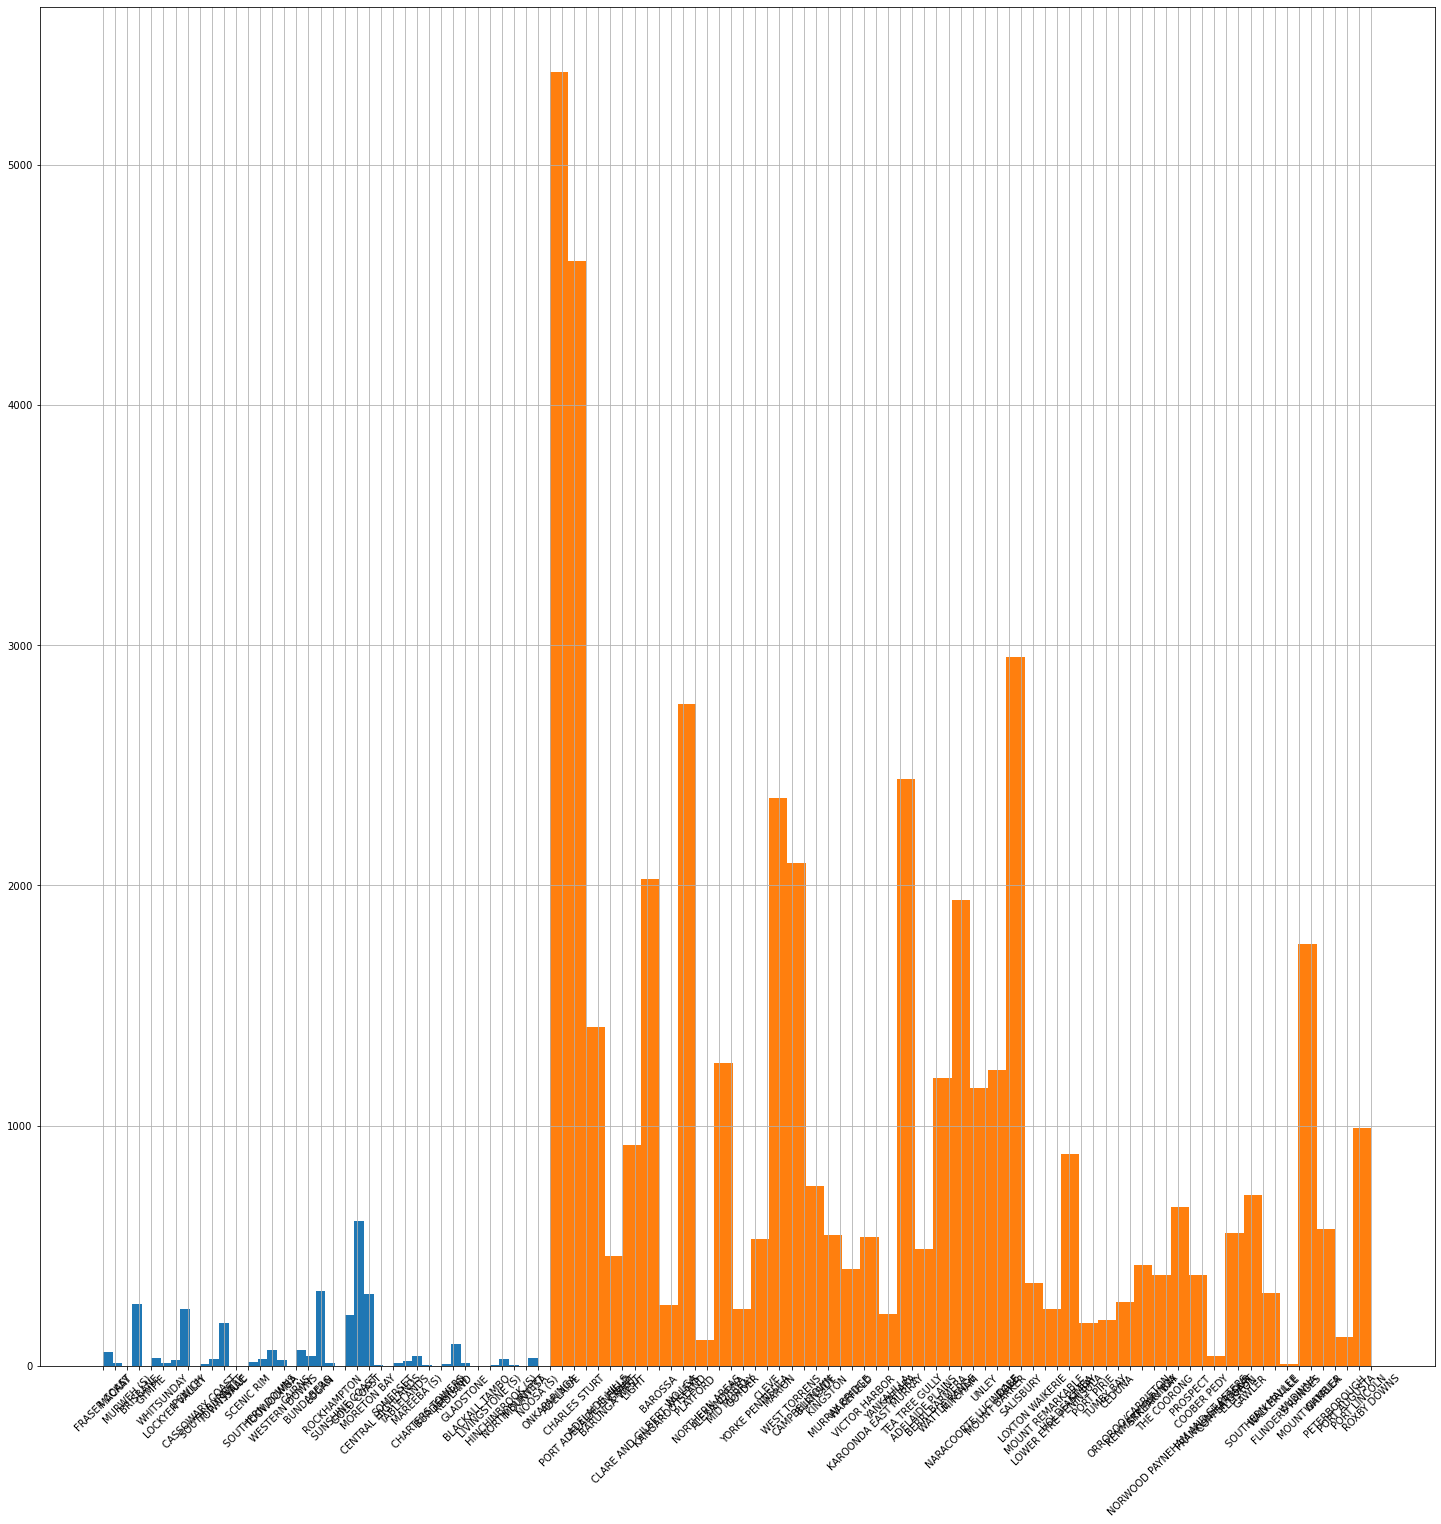

In [36]:
## compare the number of Rugby and ARL players in both states

plt.xticks(rotation=45)
qld_Rugby['LGA'].hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)##Blue is QLD
AustralianRulesPPL['Participant_LGA'].hist(density=0,histtype="stepfilled",bins=45,figsize=(25,25),)##Orange is SA

   #### Rugby and ARL are two of the sports which have the most participants in both of the states, and they 're played in a similar way. By comparing the number of players in both states, under the same y-axis, it's evident that ARL players in SA are much higher than Rugby players in QLD, which suggests that people in SA are more interested in playing adversarial sport than QLD people

# Conclusion:


Overall, there are more voucher users in SA than in QLD, this is evident in the comparison of the overall number of voucher users in all LGAs, as well as the comparison of top sports players in both of the states. This is because SA people are more interested in playing sport than QLD people, this might also caused by the lack of government propaganda which is related to the use of Sport Voucher in QLD.
Significantly  lower number of participants in QLD than SA might also suggest that aging population makes up a higher percentage of population in QLD than in SA.